<a href="https://colab.research.google.com/github/ArslanMehdi/ImageClassificationUsingCNN/blob/main/Deep_CNN_Image_Classifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **1. Setup and Load Data**

1.1 Install Dependencies and Setup 

In [1]:
!pip install tensorflow opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip list

Package                       Version
----------------------------- ---------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
array-record                  0.2.0
arviz                         0.15.1
astropy                       5.2.2
astunparse                    1.6.3
attrs                         23.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
blosc2                        2.0.0
bokeh                         2.4.3
branca                        0.6.0
build                         0.10.0
CacheControl                  0.12.11
ca

In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by settings GPU Memory Consumption Growth 
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

**1.2 Remove doggy images**

# This Chunk of Code is Used to unzip and extract the Files from the uploded .zip folder


In [5]:
from zipfile import ZipFile
file_name = '/content/Dataset/Sad.zip'

with ZipFile('/content/Dataset/Sad.zip', 'r') as zip:
  zip.extractall('/content/Dataset/Sad')
  print('Done')

Done


Re-Written the Above Code Because we have to unzip the Happy file in the data folder same could be Achived by just re-naming the above code 

In [6]:
from zipfile import ZipFile
file_name = '/content/Dataset/Happy.zip'

with ZipFile('/content/Dataset/Happy.zip', 'r') as zip:
  zip.extractall('/content/Dataset/Happy')
  print('Done')

Done


In [20]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [21]:
# We the Assigning the path to the data_dir Variable 
data_dir = '/content/Dataset'

In [27]:
# Now we are going to Check every single image in the Happy Folder 
os.listdir(os.path.join(data_dir,'Happy'))
# This Allows us to loop through the all the images that is the Main Purpose of
# doggy image Scrip 

['what-makes-people-happy1.jpg',
 'image14.jpeg',
 'happiness.jpg',
 'image15.jpeg',
 'vector13.svg',
 'nm-how-happiness-affects-health-tnail.jpg',
 'free-video-3248275.jpg',
 'VJdvLa-download-happy-blackman-png.png',
 'friends_190412.jpg',
 'Dollarphotoclub_76084977-1.jpg',
 'AOLn63ErZP0fQ2Z1oN8Jaz2ucCz1kdmCLqQy4LEtXzORs64-c-mo.jpg',
 'png-transparent-happiness-love-happy-people-love-child-hand-thumbnail.png',
 'happyball-3.jpg',
 'Photo-happy-1-unsplash-michael-dam.jpg',
 '343515-worldhappinessreport1440.jpg',
 'images7.jpg',
 'image24.jpeg',
 'file-20230208-27-3jttof.jpg',
 'friends-happy-190821.jpg',
 'happy-woman.jpg',
 'vector5.svg',
 'image30.jpeg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'happiest.jpg',
 'image11.jpeg',
 'image9.jpeg',
 'image12.jpeg',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 'image16.jpeg',
 'kate_0.png',
 'happy-woman-headphones-pink-african-american-1296x728-header.jpg',
 'vector11

In [28]:
image_exts = ['jpeg','jpg','bmp','png']

In [24]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [25]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    print(image)

images16.jpg
image14.jpeg
image15.jpeg
images17.jpg
images53.jpg
vector13.svg
images41.jpg
images21.jpg
lonely-depressed-person-sitting-near-brick-wall_181624-30778.jpg
images59.jpg
image-asset.jpeg
image31.png
depressed-man-studio-shot-260nw-404652526.jpg
images39.jpg
images61.jpg
AOLn63ErZP0fQ2Z1oN8Jaz2ucCz1kdmCLqQy4LEtXzORs64-c-mo.jpg
isolated-girl-crying-over-makeup-sad-person-concept-isolated-white-174239618.jpg
images37.jpg
kTKBe9kBc.png
5acf9ed1146e711e008b46d7.jpg
8iAb9k4aT.jpg
image-20160914-4963-19knfh1.jpg
depositphotos_86851530-stock-photo-close-up-of-african-young.jpg
images10.jpg
images55.jpg
-sitting-steps-near-water-sad-people-big-city-metropolis-lifestyle-105372126.jpg
images7.jpg
silhouettes-of-a-sad-man-with-the-background-of-the-sunset-sky-free-video.jpg
man-and-a-woman-in-a-quarrel-conflicts-between-husband-and-wife-vector.jpg
image24.jpeg
images9.jpg
sad-and-disappointed-woman-standing-by-the-sea-free-video.jpg
vector5.svg
image30.jpeg
man-tears-tear-look.jpg
ed-b

In [30]:
# In the Below mentioned Code we are loopinig through every Single Image in the Folder 
# After these Loops we could have Many different Checks tha
# Looping throught the Every folder
for image_class in os.listdir(data_dir):
  # Then Looping through the every Image in the Folder 
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir,image_class,image)
    try:
      # Here we are reading the Images through the Open-CV2 Libray  
      img = cv2.imread(image_path)
      # This Second Check is for the confermation that the Images is are of the 
      # Data types(Extension) that are Mentioned Above 
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list{}'.format(image_path))
        # This Line below delete the Images  
        os.remove(image_path)
    except Exception as e:
        print('Issues with image {}'.format(image_path))
        # os.remove(image_path)

**1.3 Load Data**

In [32]:
# Now we are going to use the TensorFlow data set API 
# This Api Allows you to build a Data Pipeline so rather than loading every-thing
# Into the Memory it allows you to Scale large Amount of Data
tf.data.Dataset
# Now instead of Using this Api Directly We will be using the Keras Utility that
# allows you to do it 

In [36]:
import numpy as np
from matplotlib import pyplot as plt

In [65]:
# Now we will be loading our Data pipline(Building the Data Pipeline)
data = tf.keras.utils.image_dataset_from_directory('Dataset')

Found 284 files belonging to 3 classes.


In [37]:
# This is Going to allow us to access the Data Genrator from the data pipline 
# Accesses that Data Pipline (allowing to loop through the data)
data_iterator = data.as_numpy_iterator()

In [43]:
# Get an other Batch From the Iterator
# Accessing the data pipeline itself (allowing to access that data)
batch = data_iterator.next();

In [44]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [45]:
batch[1]

array([1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 1, 2, 2, 1, 1], dtype=int32)

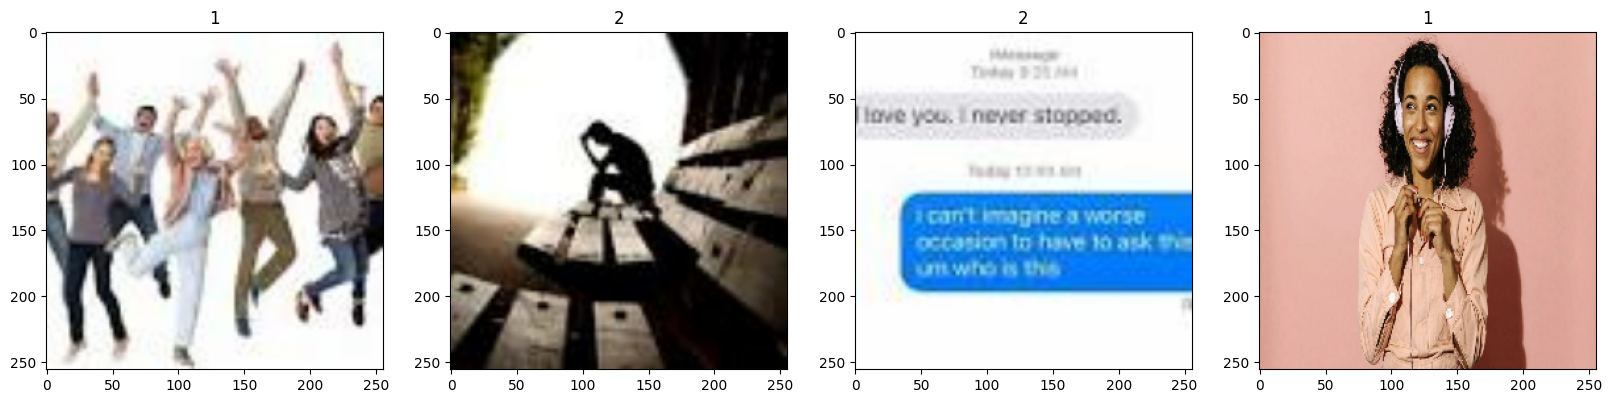

In [46]:
# Now this Code is to Review that which flag is Assigned to which as the batch
# Extracted above have 2 Parts [0] for the Image Matrix 
# Now the batch[1] consists of the flags Depending on the type of images 
# The Below Mentioned Results Show that the 2 is for Sad people and 1 is for the
# Happy People (Visulization of the images)
fig ,ax = plt.subplots(ncols=4,figsize=(20,20)) # Using Matplotlib and the Subplot to plot any time
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

# 2. Preprocessing 
Now we need the Prepocessing of the data so the Data Values Should Be between 0 and 1 not 0 and 255

### `*2.1 Scale Data*`
Batch Consists of 2 parts Images and Labels 
images = batch[0]
labels = batch[1] 

In [66]:
# Now when you are Building the Deep Learnig Model try to the Keep the Value of Image 
# as low as Possible this will help you optimize 
# As we are using the data pipline so we will be appliying division(/255) so th data 
# values will be in between the 0 & 1 as the data loads into the Memory not in a single instance
data = data.map(lambda x,y: (x/255, y))

In [67]:
sacled_iterator = data.as_numpy_iterator() # Similar to Before to Get the Acess to the Iterator

In [68]:
batch = sacled_iterator.next()

In [69]:
batch[0].max()

1.0

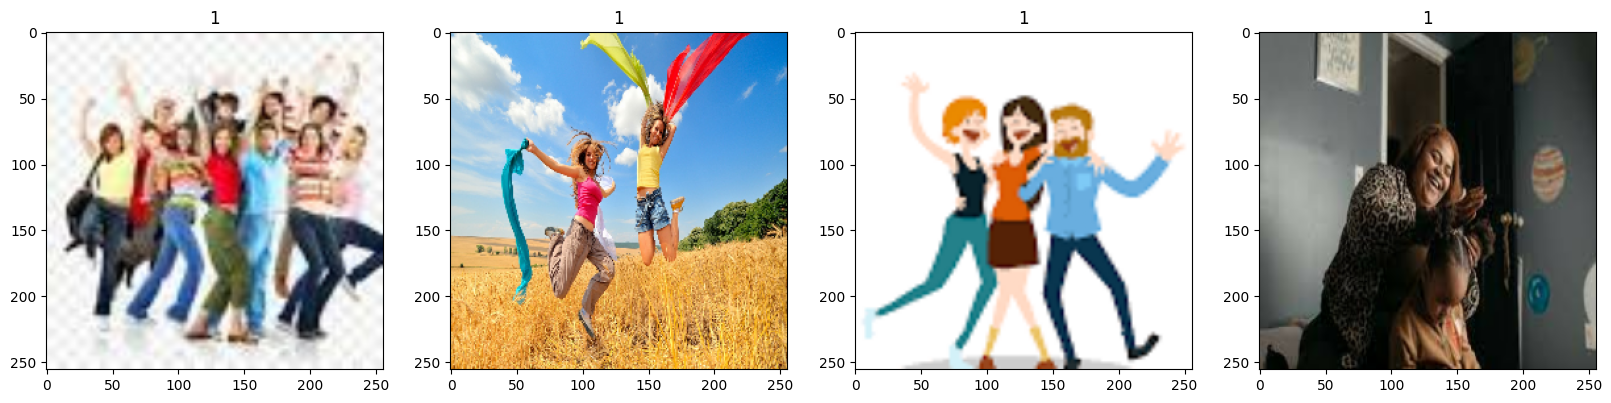

In [70]:
fig ,ax = plt.subplots(ncols=4,figsize=(20,20)) # Using Matplotlib and the Subplot to plot any time
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

### 2.2 Split Data

Now we will be Splitting the Data into 2 Data Sets Initially the Testing Data Set and the Trining Data Set Just to Avoid Overfitting of Our Data Model 

In [71]:
# Now we will be establishing that what is the Size of Our training Data Set
len(data) # In thisCase it's 9 batches 

9

In [78]:
# Now we are Defing teh Size of Data 
train_size = int(len(data)*.7) # This tells that we are using 70% of total Datafor training 
val_size = int(len(data)*.2)+1 # 20% Data to be Assigned to the Validation
test_size = int(len(data)*.1)+1

In [81]:
# Now in this Case we are Dividing the Data into the Mentioned chunks
# Using the take and Skip Functionaity of the Tensorflow
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [84]:
len(train)

6